# PREDICTION OF HEATING LOAD OF RESIDENTIAL BUILDINGS


## Project Background

TODO

## Data Exploration
### Loading Data --

In [1]:
import pandas as pd

## Loading Data

# skip the second row which is the descriptions of the columns
data_raw = pd.read_excel(io='http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx',sheet_name=0)


### Data Summary --

In [2]:
from IPython.display import display 
# Pretty display for notebooks
%matplotlib inline

# show the first few records after the data is loaded to a dataframe
print("The first 5 rows of the dataset:")
display(data_raw.head())

The first 5 rows of the dataset:


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# rename the dataframe columns to be more meanlingful
data_raw = data_raw.rename(index=str, columns={
    'X1':'Relative_Compactness',
    'X2':'Surface_Area',
    'X3':'Wall_Area',
    'X4':'Roof_Area',
    'X5':'Overall_Height',
    'X6':'Orientation',
    'X7':'Glazing_Area',
    'X8':'GA_Distribution', # Glazing area distribution
    'Y1':'Heating_Load',
    'Y2':'Cooling_Load'})

display(data_raw.head(n=1))

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,GA_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33


In [4]:
## Statistics of the Data

# get the total number of rows in the dataset
n_records = data_raw.shape[0]
print("Total number of records: {}".format(n_records))

summary = data_raw.describe()
print("Statistics of each feature of the dataset:")
display(summary)


Total number of records: 768
Statistics of each feature of the dataset:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,GA_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Exploratory Visualization

In [5]:
%matplotlib inline
#from ggplot import *
from IPython.display import display 

numerical = ['Relative_Compactness','Surface_Area', 'Wall_Area','Roof_Area','Overall_Height','Glazing_Area']


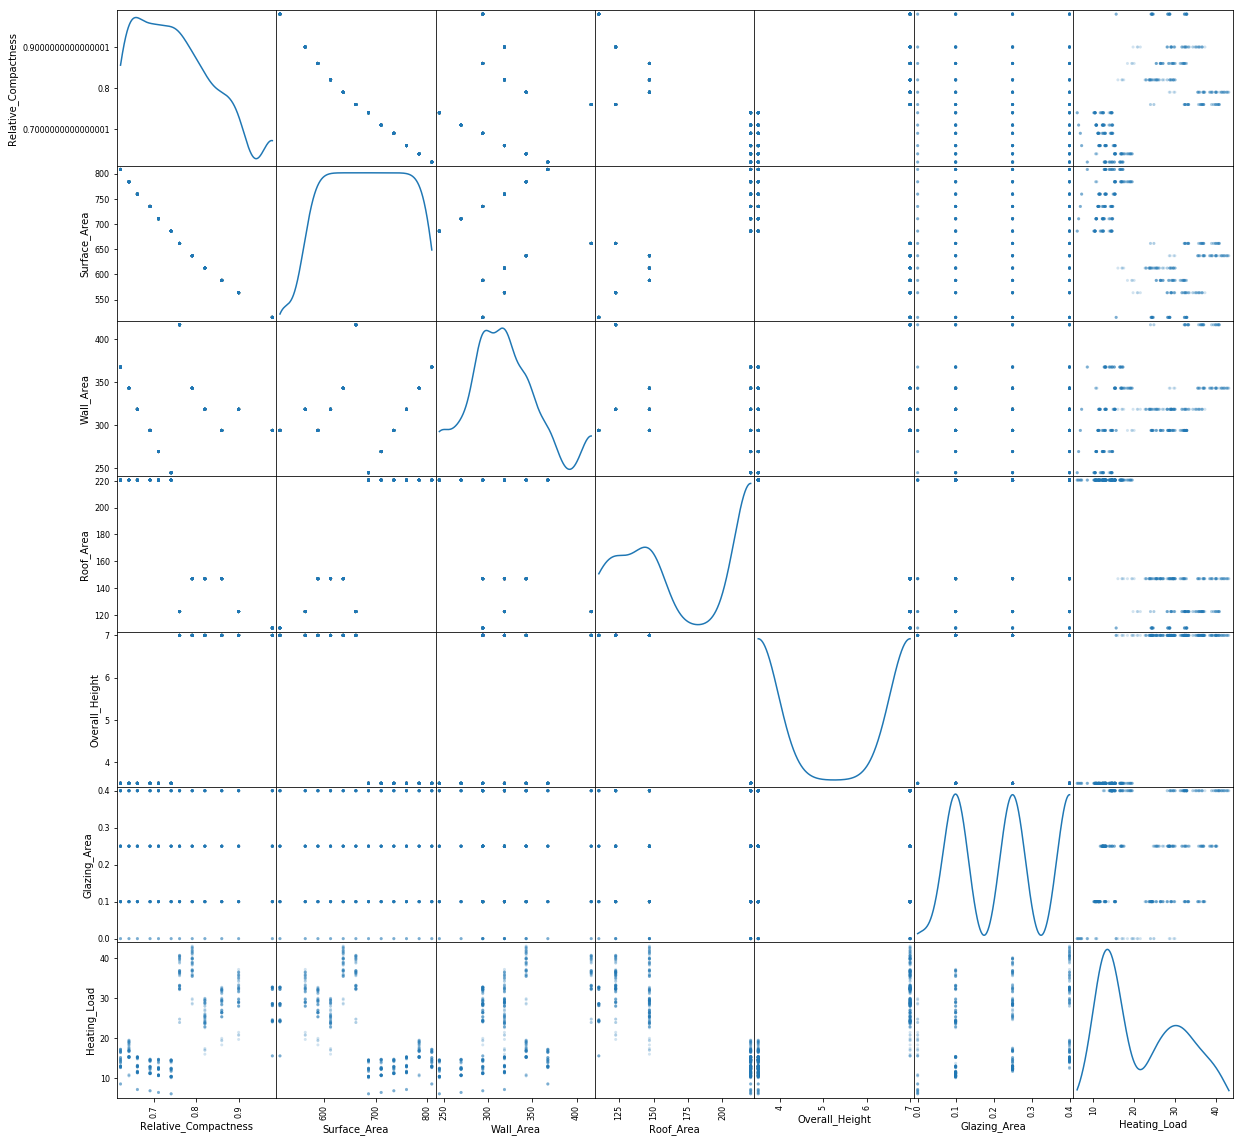

In [6]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix

scatter_matrix(data_raw[numerical + ['Heating_Load']], alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()


In [7]:
print("Correction Coefficients of the Continuous Features:")
display(data_raw[numerical + ['Heating_Load']].corr().apply(lambda x: round(x, 3)))

Correction Coefficients of the Continuous Features:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,Heating_Load
Relative_Compactness,1.000,-0.992,-0.204,-0.869,0.828,0.00,0.622
Surface_Area,-0.992,1.000,0.196,0.881,-0.858,0.00,-0.658
Wall_Area,-0.204,0.196,1.000,-0.292,0.281,-0.00,0.456
Roof_Area,-0.869,0.881,-0.292,1.000,-0.973,-0.00,-0.862
Overall_Height,0.828,-0.858,0.281,-0.973,1.000,0.00,0.889
Glazing_Area,0.000,0.000,-0.000,-0.000,0.000,1.00,0.270
Heating_Load,0.622,-0.658,0.456,-0.862,0.889,0.27,1.000


## Data Preprocessing

In [8]:
## Check Missing Values

# get the record counts for each column from the summary
counts = summary.loc['count',:]
# get the number of rows with missing values
n_records_missing_values = counts[counts != n_records].size
if n_records_missing_values == 0:
    print('No missing value found in the data')
else:
    print('Missing values exist!')

No missing value found in the data


In [9]:
## Numerical Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = data_raw
data[numerical] = scaler.fit_transform(data_raw[numerical])


In [10]:
## Output variable tranformation
import numpy as np

# TODO: figure out why log transform the output variable
data['Heating_Load'] = data['Heating_Load'].apply(lambda x: np.log(x))

In [11]:
## Categorical Feature Encoding

categorical = ['Orientation','GA_Distribution']
# One-hot encode the 'features_raw' data using pandas.get_dummies()
data = pd.get_dummies(data, columns = categorical)

summary = data.describe()
print("Statistics of each feature of the dataset after preprocessing:")
display(summary)


Statistics of each feature of the dataset after preprocessing:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,Heating_Load,Cooling_Load,Orientation_2,Orientation_3,Orientation_4,Orientation_5,GA_Distribution_0,GA_Distribution_1,GA_Distribution_2,GA_Distribution_3,GA_Distribution_4,GA_Distribution_5
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-1.451385e-16,-4.440892e-16,-1.734723e-18,3.709417e-16,0.000000,2.064321e-15,2.995968,24.587760,0.250000,0.250000,0.250000,0.250000,0.062500,0.187500,0.187500,0.187500,0.187500,0.187500
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652,1.000652e+00,0.476635,9.513306,0.433295,0.433295,0.433295,0.433295,0.242219,0.390567,0.390567,0.390567,0.390567,0.390567
min,-1.363812e+00,-1.785875e+00,-1.685854e+00,-1.470077e+00,-1.000000,-1.760447e+00,1.793425,10.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.725642e-01,-7.421818e-01,-5.619515e-01,-7.915797e-01,-1.000000,-1.009323e+00,2.564372,15.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.340162e-01,2.319318e-02,0.000000e+00,1.583159e-01,0.000000,1.173631e-01,2.941800,22.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.227813e-01,7.885681e-01,5.619515e-01,9.725122e-01,1.000000,1.244049e+00,3.455291,33.132500,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.041777e+00,1.553943e+00,2.247806e+00,9.725122e-01,1.000000,1.244049e+00,3.763523,48.030000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Implementation

### Benchmark Model 




In [12]:
output = data['Heating_Load']
features_raw = data.drop(['Heating_Load','Cooling_Load'], axis = 1)



### Handle Multicollinearity

In [13]:
import statsmodels.formula.api as smf

results = smf.OLS(output, features_raw).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1233.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:12:27   Log-Likelihood:                 671.44
No. Observations:                 768   AIC:                            -1315.
Df Residuals:                     754   BIC:                            -1250.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Relative_Compactness     0.0595 

In [14]:
import Helper

transformer = Helper.ReduceVIF(impute=False)
transformer.fit_transform(features_raw, output)

features = features_raw.drop(['Surface_Area', 'Overall_Height','Orientation_2','Orientation_3','Orientation_4','Orientation_5', 'Roof_Area'], axis = 1)
results = smf.OLS(output, features).fit()
print(results.summary())

ReduceVIF fit
ReduceVIF transform
Recommend dropping Relative_Compactness with vif=105.52405414452737
Recommend dropping Surface_Area with vif=inf
Recommend dropping Wall_Area with vif=inf
Recommend dropping Roof_Area with vif=inf
Recommend dropping Overall_Height with vif=31.20547428099314
Recommend dropping Orientation_2 with vif=inf
Recommend dropping Orientation_3 with vif=inf
Recommend dropping Orientation_4 with vif=inf
Recommend dropping Orientation_5 with vif=inf
Recommend dropping GA_Distribution_0 with vif=inf
Recommend dropping GA_Distribution_1 with vif=inf
Recommend dropping GA_Distribution_2 with vif=inf
Recommend dropping GA_Distribution_3 with vif=inf
Recommend dropping GA_Distribution_4 with vif=inf
Recommend dropping GA_Distribution_5 with vif=inf
                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:           

C:\Users\SYU\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### Dataset Splitting

In [15]:
from sklearn.model_selection import train_test_split

#features = data[numerical]
x_train_val, x_test, y_train_val, y_test = train_test_split(features, output, test_size=.15, random_state=12)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=.15, random_state=12)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from time import time

def train_predict(learner, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: defaulted training set
       - X_val: features validation set
       - y_val: defaulted validation set
    '''
    
    results = {}
    
    # Fit the learner to the training data
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the training and validation set,
    start = time() # Get start time
    predictions_train = learner.predict(X_train)
    predictions_val = learner.predict(X_val)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
                    
    # Compute mean squared errors on the validation and test set
    results['mse_train'] = mean_squared_error(y_train, predictions_train)
    results['mse_val'] = mean_squared_error(y_val, predictions_val)
            
    # Compute coefficient of determination (R^2) on the validation and test set
    results['r2_train'] = r2_score(y_train, predictions_train)
    results['r2_val'] = r2_score(y_val, predictions_val)

    # Success
    print("\n{} training results:".format(learner.__class__.__name__))
    #print("\n\tTraining time: {0:.2f} secconds".format(results['train_time']))
    #print("\n\tPrediction time: {0:.2f} secconds".format(results['pred_time']))
    print("\n\tTraining Mean Squared Errors: {0:.3f}".format(results['mse_train']))
    print("\n\tValidation Mean Squared Errors: {0:.3f}".format(results['mse_val']))
    print("\n\tTraining R2 Score: {0:.3f}".format(results['r2_train']))
    print("\n\tValidation R2 Score: {0:.3f}".format(results['r2_val']))


In [17]:
## Model Training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
rgs_A = LinearRegression()
rgs_B = RandomForestRegressor(random_state = 12)

for rgs in [rgs_A, rgs_B]:
    train_predict(rgs, x_train, y_train, x_val, y_val)


LinearRegression training results:

	Training Mean Squared Errors: 0.029

	Validation Mean Squared Errors: 0.031

	Training R2 Score: 0.875

	Validation R2 Score: 0.851

RandomForestRegressor training results:

	Training Mean Squared Errors: 0.000

	Validation Mean Squared Errors: 0.000

	Training R2 Score: 0.999

	Validation R2 Score: 0.998
